In [53]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Read into csv file
schools_csv_file = "./Resources/dv279-schoollocations2019.csv"
schools_df = pd.read_csv(schools_csv_file)
schools_df.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [4]:
# Drop unwanted columns
to_drop = ["School_Status",
          "Address_Line_1",
          "Address_Line_2",
          "Address_Town",
          "Address_State",
          "Postal_Address_Line_2",
          "Full_Phone_No",
          "Address_Postcode",
          "Postal_State",
          "LGA_ID"]

schools_df.drop(columns=to_drop, inplace=True)

In [5]:
schools_df.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Postal_Address_Line_1,Postal_Town,Postal_Postcode,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,21 Thomson Street,ALBERTON,3971,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,Frank Street,ALLANSFORD,3277,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,P O Box 12,AVOCA,3467,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,40 Anderson Street,AVENEL,3664,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,5-11 Forbes Street,WARRANDYTE,3113,Manningham (C),145.213980,-37.742675


In [6]:
# Split LGA Name
schools_df["LGA_Name"] = schools_df.LGA_Name.apply(lambda x: pd.Series(str(x).split(" "))) 

In [7]:
# Capitalise and lower postal town names
schools_df["Postal_Town"] = schools_df.Postal_Town.apply(lambda x: pd.Series(str(x).lower().capitalize()))

In [8]:
schools_df.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Postal_Address_Line_1,Postal_Town,Postal_Postcode,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,Wellington,146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,Warrnambool,142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,P O Box 12,Avoca,3467,Pyrenees,143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,Strathbogie,145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,Manningham,145.213980,-37.742675


In [9]:
# Rename postcode column
schools_df = schools_df.rename(columns={"Postal_Postcode": "Postcode",
                                       "Postal_Town": "Suburb",
                                       "X": "Lat",
                                       "Y": "Lng"})
schools_df

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Postal_Address_Line_1,Suburb,Postcode,LGA_Name,Lat,Lng
0,Government,1,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,Wellington,146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,Warrnambool,142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,P O Box 12,Avoca,3467,Pyrenees,143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,Strathbogie,145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,Manningham,145.213980,-37.742675
...,...,...,...,...,...,...,...,...,...,...,...
2249,Catholic,2,2222,Our Lady Star of the Sea Catholic Primary School,Primary,6 Cowes-Rhyll Road,Cowes,3922,Bass,145.239805,-38.463698
2250,Independent,2,2223,Maxwell Creative School,Primary,6 Rainy Hill Road,Cockatoo,3781,Cardinia,145.518028,-37.923946
2251,Catholic,2,2224,St Anne's College,Pri/Sec,72 Wendouree Drive,Kialla,3631,Greater,145.400337,-36.436121
2252,Catholic,2,2225,Holy Trinity Catholic Primary School,Primary,145 Mitchells Lane,Sunbury,3429,Hume,144.705316,-37.584791


In [11]:
# Retrieve postcode and suburbs
postcode_suburb_df = schools_df[["Postcode", "Suburb"]]
postcode_suburb_df = postcode_suburb_df.drop_duplicates()

# Export into a csv file
postcode_suburb_df.to_csv("./output/postcode_suburb_df.csv", index=False)

In [12]:
# Read into created csv
postcode_suburb = pd.read_csv("./output/postcode_suburb_df.csv")
postcode_suburb

,Postcode,Suburb
0,3971,Alberton
1,3277,Allansford
2,3467,Avoca
3,3664,Avenel
4,3113,Warrandyte
...,...,...
953,3954,Koonwarra
954,3076,Epping north
955,3030,Werribee plaza
956,3029,Truganina south


In [14]:
# Groupby suburbs
grouped_schools_df = schools_df.groupby(["Suburb"])

# Find number of schools in each suburb
schools_count = grouped_schools_df["School_Name"].count()
schools_count

# Create a new df with school count
schools_count_df = schools_count.reset_index()
schools_count_df

# Rename column
schools_count_df = schools_count_df.rename(columns={"Suburb": "suburb",
                                                    "School_Name": "School Count"})
schools_count_df

,suburb,School Count
0,Abbotsford,3
1,Aberfeldie,2
2,Aireys inlet,1
3,Airly,1
4,Airport west,1
...,...,...
932,Yarrawonga,3
933,Yea,3
934,Yinnar,1
935,Yinnar south,1


In [16]:
# Import pre-covid housing data
pre_covid_sales_file = "./MT_resources/vic-sales-precovid.csv"
pre_covid_sales_df = pd.read_csv(pre_covid_sales_file)
pre_covid_sales_df

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,0,2018-09-02,1123000.0,Elsternwick,Melbourne,VIC,-37.880265,145.002303,3,townhouse,VIC857,VIC89,3185.0
1,1,2018-09-02,460000.0,Rosebud,Melbourne,VIC,-38.389428,144.924085,3,house,VIC2199,VIC125,3939.0
2,2,2018-09-02,450000.0,Cheltenham,Melbourne,VIC,-37.964607,145.053552,2,unit,VIC537,VIC98,3192.0
3,3,2018-09-02,575000.0,Keysborough,Melbourne,VIC,-38.004906,145.165695,2,townhouse,VIC1334,VIC91,3173.0
4,4,2018-09-02,620000.0,Pakenham,Melbourne,VIC,-38.058174,145.454603,4,house,VIC2023,VIC161,3810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45700,45700,2020-01-31,626500.0,Wollert,Melbourne,VIC,-37.609187,145.020637,4,house,VIC2821,VIC114,3750.0
45701,45701,2020-01-31,612500.0,Rosebud,Melbourne,VIC,-38.381654,144.925493,3,house,VIC2199,VIC125,3939.0
45702,45702,2020-01-31,592500.0,Croydon,Melbourne,VIC,-37.794486,145.290692,3,house,VIC680,VIC139,3136.0
45703,45703,2020-01-31,424050.0,Wollert,Melbourne,VIC,-37.609029,145.018557,3,house,VIC2821,VIC114,3750.0


In [18]:
# Merge suburb school counts into pre-covid housing data
merged_pre_covid = pd.merge(schools_count_df, pre_covid_sales_df, how="left", on="suburb")
merged_pre_covid

,suburb,School Count,Unnamed: 0,date_sold,price,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,Abbotsford,3,222.0,2018-09-05,545000.0,Melbourne,VIC,-37.801729,144.996385,2.0,unit,VIC2,VIC115,3067.0
1,Abbotsford,3,1591.0,2018-09-17,596000.0,Melbourne,VIC,-37.810297,145.007797,2.0,unit,VIC2,VIC115,3067.0
2,Abbotsford,3,1939.0,2018-09-21,765000.0,Melbourne,VIC,-37.810297,145.007797,2.0,townhouse,VIC2,VIC115,3067.0
3,Abbotsford,3,2135.0,2018-09-22,1110000.0,Melbourne,VIC,-37.806959,144.996318,2.0,house,VIC2,VIC115,3067.0
4,Abbotsford,3,2189.0,2018-09-22,970000.0,Melbourne,VIC,-37.811142,145.007578,3.0,house,VIC2,VIC115,3067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46429,Yarrawonga,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46430,Yea,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46431,Yinnar,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46432,Yinnar south,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Check pre covid data for nulls
merged_pre_covid.count()

suburb           46434
School Count     46434
Unnamed: 0       45705
date_sold        45705
price            45705
city_name        45705
state            45705
lat              45705
lon              45705
bedrooms         45705
property_type    45705
loc_pid          45705
lga_pid          45705
Postcode         45705
dtype: int64

In [21]:
# Drop null values
merged_pre_covid = merged_pre_covid.dropna()
merged_pre_covid

,suburb,School Count,Unnamed: 0,date_sold,price,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,Abbotsford,3,222.0,2018-09-05,545000.0,Melbourne,VIC,-37.801729,144.996385,2.0,unit,VIC2,VIC115,3067.0
1,Abbotsford,3,1591.0,2018-09-17,596000.0,Melbourne,VIC,-37.810297,145.007797,2.0,unit,VIC2,VIC115,3067.0
2,Abbotsford,3,1939.0,2018-09-21,765000.0,Melbourne,VIC,-37.810297,145.007797,2.0,townhouse,VIC2,VIC115,3067.0
3,Abbotsford,3,2135.0,2018-09-22,1110000.0,Melbourne,VIC,-37.806959,144.996318,2.0,house,VIC2,VIC115,3067.0
4,Abbotsford,3,2189.0,2018-09-22,970000.0,Melbourne,VIC,-37.811142,145.007578,3.0,house,VIC2,VIC115,3067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46424,Yarraville,4,44882.0,2020-01-20,500000.0,Melbourne,VIC,-37.820978,144.887066,2.0,unit,VIC2918,VIC101,3013.0
46425,Yarraville,4,45013.0,2020-01-21,672250.0,Melbourne,VIC,-37.822090,144.889157,2.0,townhouse,VIC2918,VIC101,3013.0
46426,Yarraville,4,45581.0,2020-01-30,1650000.0,Melbourne,VIC,-37.817283,144.896093,5.0,house,VIC2918,VIC101,3013.0
46427,Yarraville,4,45645.0,2020-01-31,550000.0,Melbourne,VIC,-37.810597,144.895658,2.0,unit,VIC2918,VIC101,3013.0


In [22]:
# Rename columns for consistency
merged_pre_covid = merged_pre_covid.rename(columns={"Postcode": "postcode",
                                                    "School Count": "school_count"})
merged_pre_covid

,suburb,school_count,Unnamed: 0,date_sold,price,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,postcode
0,Abbotsford,3,222.0,2018-09-05,545000.0,Melbourne,VIC,-37.801729,144.996385,2.0,unit,VIC2,VIC115,3067.0
1,Abbotsford,3,1591.0,2018-09-17,596000.0,Melbourne,VIC,-37.810297,145.007797,2.0,unit,VIC2,VIC115,3067.0
2,Abbotsford,3,1939.0,2018-09-21,765000.0,Melbourne,VIC,-37.810297,145.007797,2.0,townhouse,VIC2,VIC115,3067.0
3,Abbotsford,3,2135.0,2018-09-22,1110000.0,Melbourne,VIC,-37.806959,144.996318,2.0,house,VIC2,VIC115,3067.0
4,Abbotsford,3,2189.0,2018-09-22,970000.0,Melbourne,VIC,-37.811142,145.007578,3.0,house,VIC2,VIC115,3067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46424,Yarraville,4,44882.0,2020-01-20,500000.0,Melbourne,VIC,-37.820978,144.887066,2.0,unit,VIC2918,VIC101,3013.0
46425,Yarraville,4,45013.0,2020-01-21,672250.0,Melbourne,VIC,-37.822090,144.889157,2.0,townhouse,VIC2918,VIC101,3013.0
46426,Yarraville,4,45581.0,2020-01-30,1650000.0,Melbourne,VIC,-37.817283,144.896093,5.0,house,VIC2918,VIC101,3013.0
46427,Yarraville,4,45645.0,2020-01-31,550000.0,Melbourne,VIC,-37.810597,144.895658,2.0,unit,VIC2918,VIC101,3013.0


In [34]:
# Groupby on suburbs
grouped_suburbs_df = merged_pre_covid.groupby(["suburb"])

# Normalise housing prices in each suburb by finding the average purchase
grouped_suburbs_df = round(grouped_suburbs_df[["school_count", "price"]].mean(),2)

grouped_suburbs_df

,school_count,price
suburb,,
Abbotsford,3,768112.15
Aberfeldie,2,1334197.92
Albanvale,1,510140.55
Albion,2,477376.74
Alphington,3,1234962.69
...,...,...
Windsor,3,783149.64
Wollert,2,560382.17
Yallambie,1,823764.15


&lt;matplotlib.axes._subplots.AxesSubplot at 0x1b885668898&gt;

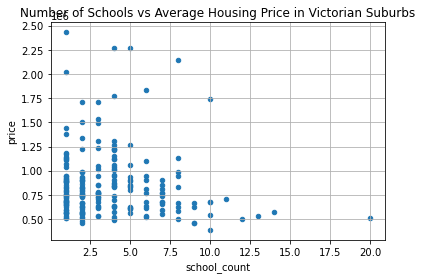

In [39]:
# Visualise
grouped_suburbs_df.plot(kind="scatter", x="school_count", y="price", grid=True, title="Number of Schools vs Average Housing Price in Victorian Suburbs")

In [65]:
# Linear regression function
def create_linear_regression_plot(x_values, y_values, x_label, y_label, period, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    
    # Using pyplot to create scatter plot
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim != None:
        plt.ylim = (0, ylim)
    plt.title(f'{period} covid - {x_label} vs. {y_label}')
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Print correlation between both factors
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    # Save linear regression plot as png file
    #plt.savefig(f"./output/{period}_{x_label}_vs_{y_label}.png")
    
    return plt.plot(x_values,regress_values,"r-")

The r-squared is: 0.010683565653367462
The correlation between both factors is -0.1


[&lt;matplotlib.lines.Line2D at 0x1b88c98a898&gt;]

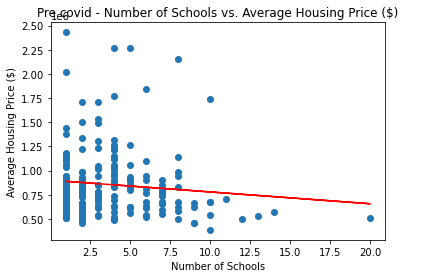

In [68]:
x_values = grouped_suburbs_df["school_count"]
y_values = grouped_suburbs_df["price"]
create_linear_regression_plot(x_values, y_values, "Number of Schools", "Average Housing Price ($)", "Pre", (10,1.5), ylim=None)